In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cabs-fare-data/Cab_Data.csv
/kaggle/input/cabs-fare-data/City.csv
/kaggle/input/cabs-fare-data/Customer_ID.csv
/kaggle/input/cabs-fare-data/Transaction_ID.csv


## **G2M (Go-to-Market strategy) Insight for Cab Investment Firm EDA (Exploratory Data Analysis)**

#### **Problem Definition and Delivery** 
◾XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

◾XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

#### **Dataset**
There have been provided 4 individual data sets. Time period of data is from **31/01/2016** to **31/12/2018**.
Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

**Author : Ugur Selim Ozen**


In [2]:
# I imported following python libraries to utilize in EDA process.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime

### **Data Overview**

#### In this section , I analyzed dataset's shape(entries,features) , missing values(NA or Null values) , feature's datatypes and looked at head of dataset's.

In [3]:
pathfile1 = '/kaggle/input/cabs-fare-data/Cab_Data.csv'
CabData = pd.read_csv(pathfile1)
missing_value = 0
for column in CabData.columns :
    missing_value += CabData[column].isna().sum() + CabData[column].isnull().sum()
print('CabData dataset has {} entries , {} features and {} missing values'.format(CabData.shape[0] ,CabData.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(CabData.dtypes))
CabData.head(10)

CabData dataset has 359392 entries , 7 features and 0 missing values

Feature's datatypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,07-01-2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,03-01-2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,07-01-2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,12-01-2016,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,06-01-2016,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [4]:
pathfile2 = '/kaggle/input/cabs-fare-data/City.csv'
City = pd.read_csv(pathfile2)
missing_value = 0
for column in City.columns :
    missing_value += City[column].isna().sum() + City[column].isnull().sum()
print('City dataset has {} entries , {} features and {} missing values'.format(City.shape[0] ,City.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(City.dtypes))
City.head(20)

City dataset has 20 entries , 3 features and 0 missing values

Feature's datatypes

City          object
Population    object
Users         object
dtype: object


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [5]:
pathfile3 = '/kaggle/input/cabs-fare-data/Customer_ID.csv'
CustomerID = pd.read_csv(pathfile3)
missing_value = 0
for column in CustomerID.columns :
    missing_value += CustomerID[column].isna().sum() + CustomerID[column].isnull().sum()
print('CustomerID dataset has {} entries , {} features and {} missing values'.format(CustomerID.shape[0] ,CustomerID.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(CustomerID.dtypes))
CustomerID.head(10)

CustomerID dataset has 49171 entries , 4 features and 0 missing values

Feature's datatypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [6]:
pathfile4 = '/kaggle/input/cabs-fare-data/Transaction_ID.csv'
TransactionID = pd.read_csv(pathfile4)
missing_value = 0
for column in TransactionID.columns :
    missing_value += TransactionID[column].isna().sum() + TransactionID[column].isnull().sum()
print('TransactionID dataset has {} entries , {} features and {} missing values'.format(TransactionID.shape[0] ,TransactionID.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(TransactionID.dtypes))
TransactionID.head(10)

TransactionID dataset has 440098 entries , 3 features and 0 missing values

Feature's datatypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


#### **Merging All Datasets to MasterData** 

In [7]:
# Here merged all 4 files into one MasterData  to analyze entire dataset.
MasterData = CabData.merge(TransactionID, on= 'Transaction ID').merge(CustomerID, on ='Customer ID').merge(City, on = 'City')
missing_value = 0
for column in MasterData.columns :
    missing_value += MasterData[column].isna().sum() + MasterData[column].isnull().sum()
print('MasterData dataset has {} entries , {} features and {} missing values'.format(MasterData.shape[0] ,MasterData.shape[1] ,missing_value))
print("\nFeature's datatypes\n\n{}".format(MasterData.dtypes))
MasterData.head(10)

MasterData dataset has 359392 entries , 14 features and 0 missing values

Feature's datatypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,04-05-2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,27-10-2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,21-09-2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,23-06-2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"


### **Data Cleaning and Feature Engineering**

#### In this section , I transformed some features to appropriate datatypes and formats.

In [8]:
#removing ',' in population and users column values
#replacing spaces with '_' in column names 

for column in MasterData.columns:
    if ' ' in column:
        MasterData = MasterData.rename(columns={column:column.replace(' ','_')})
        
for column in ["Population","Users"] :
    
        MasterData[column] = MasterData[column].str.replace(',','')
        
MasterData.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
5,10324737,04-05-2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701
6,10395626,27-10-2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701
7,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
8,10079404,21-09-2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
9,10186994,23-06-2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701


In [9]:
# Converted some columns from object to category or int64 datatypes to work with appropriate ones.
# Converted Data of Travel column to datetime object.

MasterData['Date_of_Travel'] = pd.to_datetime(MasterData['Date_of_Travel'])

for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        MasterData[column] = MasterData[column].astype('category')
        
        
for column in ["Population", "Users" ] :
    
        MasterData[column] = MasterData[column].astype('int64')
        
print("\nFeature's datatypes\n\n{}".format(MasterData.dtypes))


Feature's datatypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                     category
City                        category
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income_(USD/Month)             int64
Population                     int64
Users                          int64
dtype: object


### **Statistical Overview and Data Analysis**

#### In this section , I analyzed statinfos , distributions , outliers , boxplots , correlations , covariance and so on of some columns of entire MasterData.

In [10]:
# Here I splitted MasterData into two dataset for every Cab Firm to analyze them individually.
Pink_MasterData = MasterData [MasterData['Company'] == 'Pink Cab'] 
Yellow_MasterData = MasterData [MasterData['Company'] == 'Yellow Cab']
selected_columns = ['KM_Travelled','Price_Charged','Cost_of_Trip', 'Age' ,'Income_(USD/Month)', 'Population' , 'Users']

In [11]:
# Getting the statinfo's of selected columns from MasterData for Pink Cab Firm
filtered_Pink_MasterData = Pink_MasterData[selected_columns]
Pink_Cab_StatsInfo = filtered_Pink_MasterData.describe()
Pink_Cab_StatsInfo

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,8.471100e+04,84711.000000
mean,22.559917,310.800856,248.148682,35.322414,15059.047137,2.350642e+06,125590.813330
std,12.231092,181.995661,135.403345,12.644780,7991.077762,2.734890e+06,94593.433659
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,159.970000,131.868000,25.000000,8371.000000,8.148850e+05,27247.000000
50%,22.440000,298.060000,246.330000,33.000000,14713.000000,1.595037e+06,144132.000000
75%,32.960000,441.505000,360.180000,42.000000,21055.000000,1.955130e+06,164468.000000
max,48.000000,1623.480000,576.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [12]:
# Getting the statinfo's of selected columns from MasterData for Pink Cab Firm
filtered_Yellow_MasterData = Yellow_MasterData[selected_columns]
Yellow_Cab_StatsInfo = filtered_Yellow_MasterData.describe()
Yellow_Cab_StatsInfo

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817,3.373228e+06,168473.246981
std,12.234298,288.386166,162.548986,12.578625,7962.727062,3.439014e+06,100570.558886
min,1.900000,20.730000,22.800000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000,6.712380e+05,80021.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000,1.595037e+06,144132.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000,8.405837e+06,302149.000000


<AxesSubplot:xlabel='Income_(USD/Month)', ylabel='Count'>

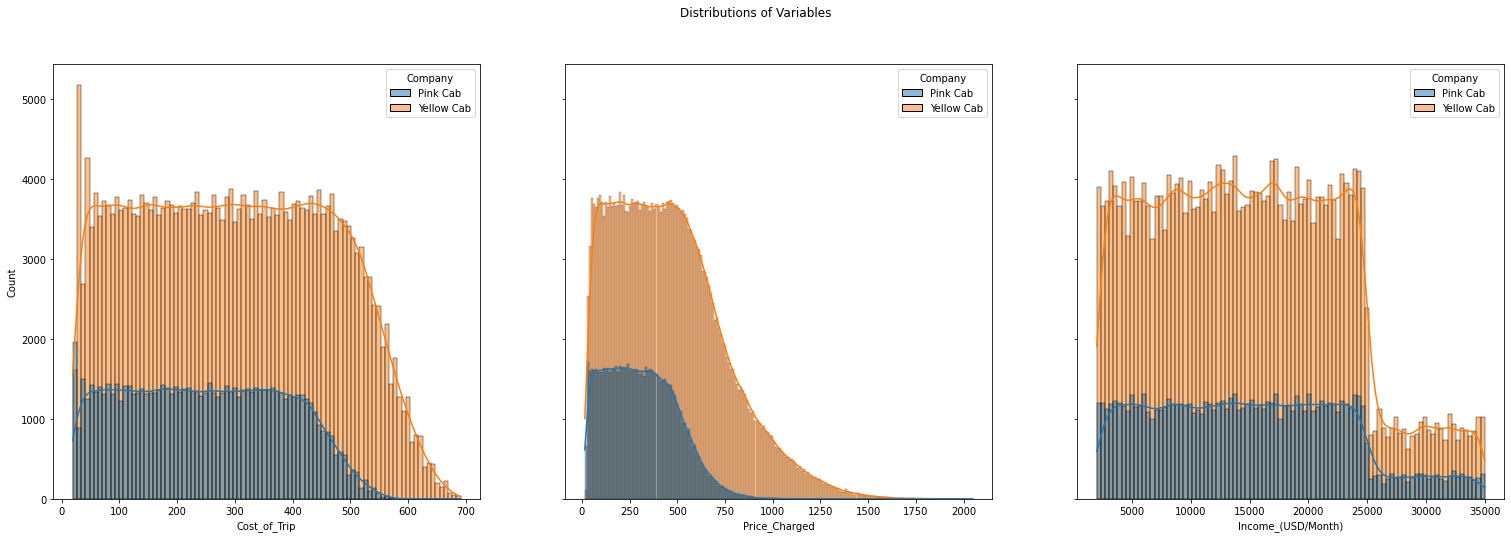

In [13]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 3 , figsize=(26,8), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=MasterData , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MasterData , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[2], data=MasterData , x='Income_(USD/Month)' , kde = True , hue="Company") 

<AxesSubplot:xlabel='KM_Travelled', ylabel='Count'>

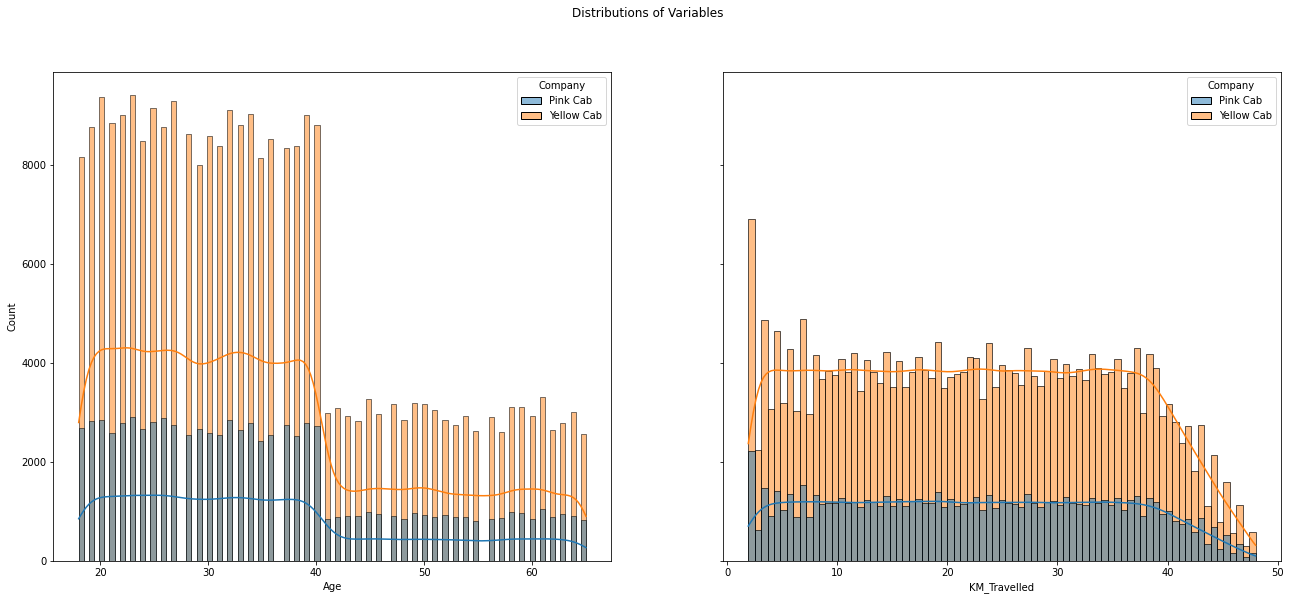

In [14]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 ,figsize=(22,9), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0],data=MasterData , x='Age' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MasterData , x='KM_Travelled' , kde = True , hue="Company")

<AxesSubplot:xlabel='Users', ylabel='Count'>

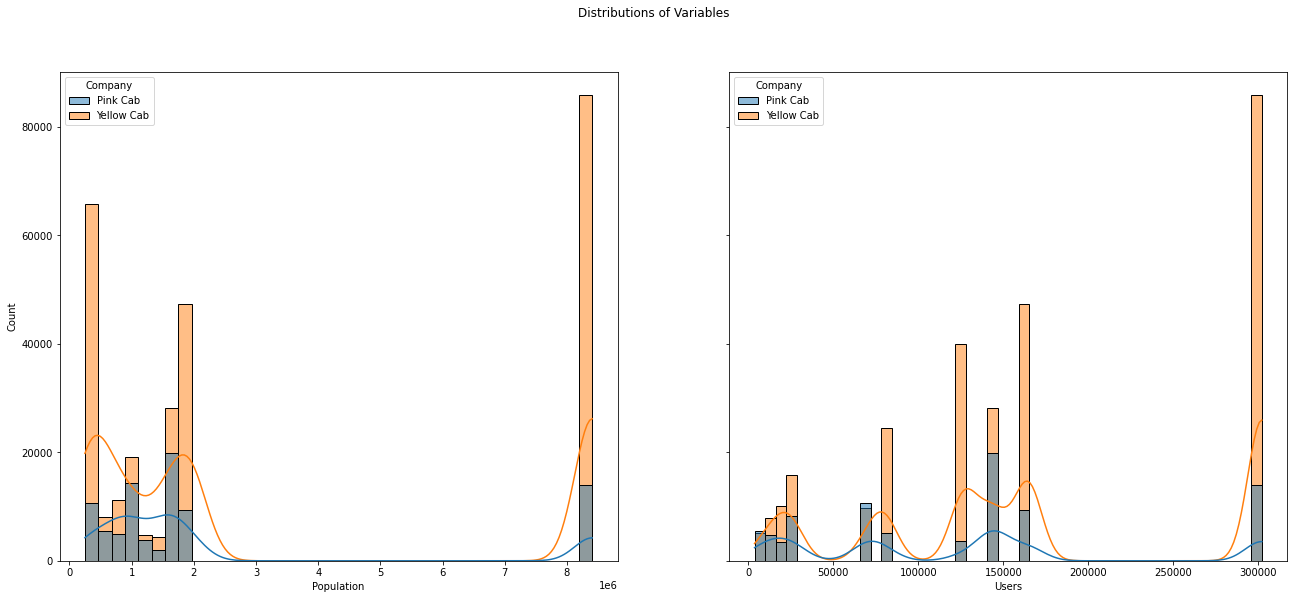

In [15]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 , figsize=(22 ,9), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=MasterData , x='Population' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MasterData , x='Users' , kde = True , hue="Company")

In [16]:
#Outlier points and lower-upper limits were analyzed by IQR method by filtering the data from the statistical value table of the desired variables.
def showIQRstats(dataFrame_statsinfo,column_name):
    
    mean   = dataFrame_statsinfo[column_name][1]
    median = dataFrame_statsinfo[column_name][5]
    median_mean_ratio = median/mean
    Q1     = dataFrame_statsinfo[column_name][4]
    Q3     = dataFrame_statsinfo[column_name][6]
    IQR    = Q3-Q1
    upper_band = Q3 + 1.5*IQR
    lower_band = Q1 - 1.5*IQR
    
    print('\n\n' + "mean of : " + str(column_name) + " is " + str(mean) +
          '\n' + "median of : " + str(column_name) + " is " + str(median) +
          '\n' + "median/mean ratio of : " +  str(column_name) + " is " + str(median_mean_ratio) +
          '\n' + "Q1 value of : "  + str(column_name) + " is "  + str(Q1) +
          '\n' + "Q3 value of : "  + str(column_name) + " is "  + str(Q3) + 
          '\n' + "IQR value of : " + str(column_name) + " is " + str(IQR) + 
          '\n' + "Upper and Lower Limits of " + str(column_name) + " is "  + str((lower_band,upper_band))
         )
    
    return upper_band , lower_band

In [17]:
print('Statistical infos of Pink Cab Firm :')
for column_name in selected_columns :
    upper_band , lower_band = showIQRstats(Pink_Cab_StatsInfo , column_name)
    outliers = filtered_Pink_MasterData[(filtered_Pink_MasterData[column_name] < lower_band) | (filtered_Pink_MasterData[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n\n**********************************************************\n')

Statistical infos of Pink Cab Firm :


mean of : KM_Travelled is 22.559916775861275
median of : KM_Travelled is 22.44
median/mean ratio of : KM_Travelled is 0.9946845204681968
Q1 value of : KM_Travelled is 12.0
Q3 value of : KM_Travelled is 32.96
IQR value of : KM_Travelled is 20.96
Upper and Lower Limits of KM_Travelled is (-19.44, 64.4)

KM_Travelled has 0 outliers : []


**********************************************************



mean of : Price_Charged is 310.80085620521635
median of : Price_Charged is 298.06
median/mean ratio of : Price_Charged is 0.9590063670969948
Q1 value of : Price_Charged is 159.97
Q3 value of : Price_Charged is 441.505
IQR value of : Price_Charged is 281.53499999999997
Upper and Lower Limits of Price_Charged is (-262.3325, 863.8074999999999)

Price_Charged has 237 outliers : [ 902.65  870.48  896.35  901.07  869.94  891.22  901.71 1078.86  953.
  885.4   880.62  903.42  905.8   889.1  1105.72  880.57  910.33  954.04
  997.84 1021.72  983.99  870.29 1022.59

In [18]:
print('Statistical infos of Yellow Cab Firm :')
for column_name in selected_columns :
    upper_band , lower_band = showIQRstats(Yellow_Cab_StatsInfo , column_name)
    outliers = filtered_Yellow_MasterData[(filtered_Yellow_MasterData[column_name] < lower_band) | (filtered_Yellow_MasterData[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n\n**********************************************************\n')

Statistical infos of Yellow Cab Firm :


mean of : KM_Travelled is 22.56951689414197
median of : KM_Travelled is 22.44
median/mean ratio of : KM_Travelled is 0.9942614237269923
Q1 value of : KM_Travelled is 11.99
Q3 value of : KM_Travelled is 32.96
IQR value of : KM_Travelled is 20.97
Upper and Lower Limits of KM_Travelled is (-19.464999999999996, 64.41499999999999)

KM_Travelled has 0 outliers : []


**********************************************************



mean of : Price_Charged is 458.1819899811058
median of : Price_Charged is 425.06
median/mean ratio of : Price_Charged is 0.9277099696073352
Q1 value of : Price_Charged is 226.68
Q3 value of : Price_Charged is 633.88
IQR value of : Price_Charged is 407.2
Upper and Lower Limits of Price_Charged is (-384.11999999999995, 1244.6799999999998)

Price_Charged has 3240 outliers : [1341.17 1412.06 1540.61 ... 1282.89 1385.05 1406.5 ]


**********************************************************



mean of : Cost_of_Trip is 297.92200414007

Text(0, 0.5, 'Yellow Cab')

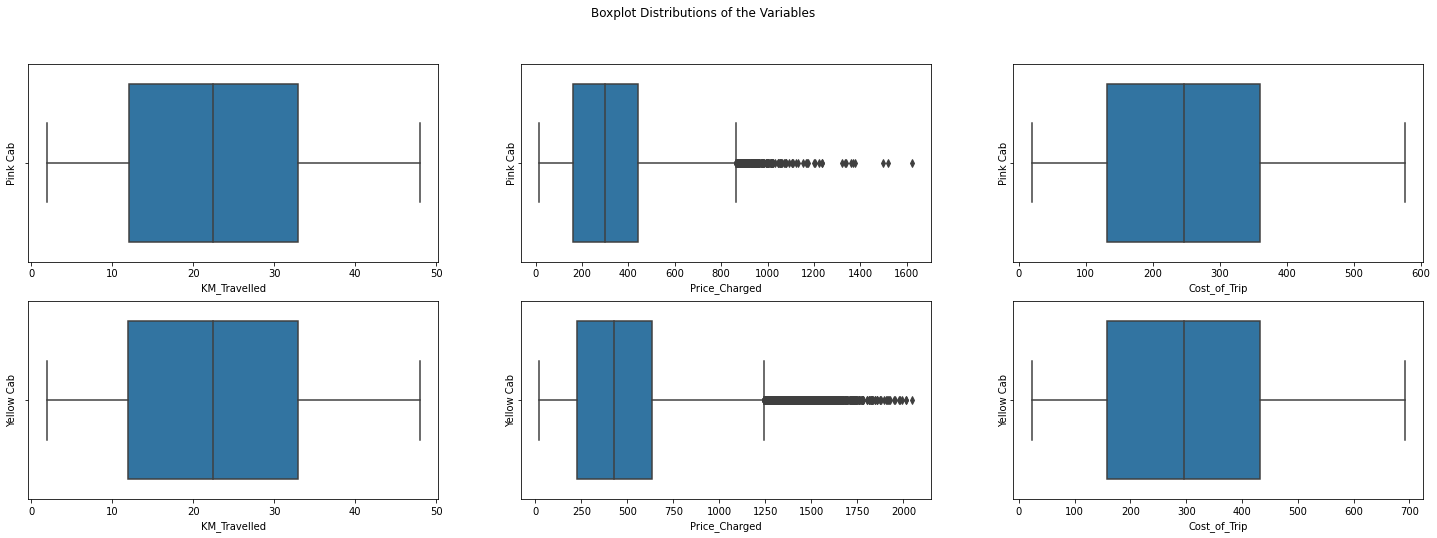

In [19]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' ,        data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   ,     data=filtered_Pink_MasterData  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,        data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,        data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged'   ,     data=filtered_Yellow_MasterData  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,        data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")


Text(0, 0.5, 'Yellow Cab')

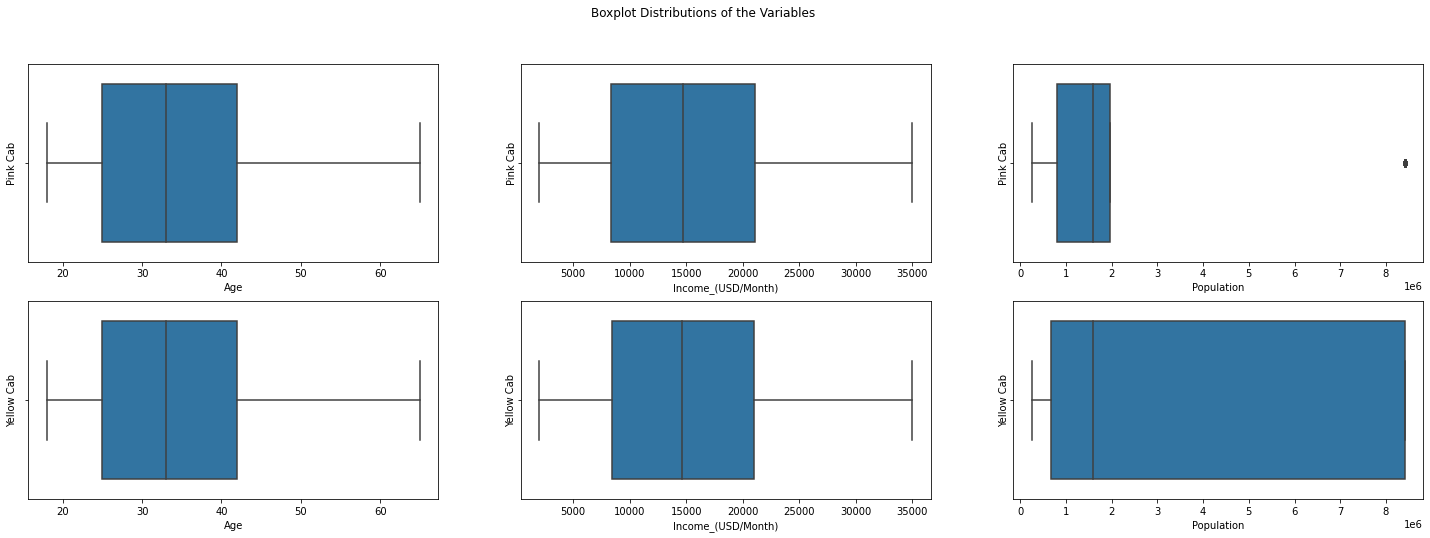

In [20]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Age' ,                 data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Income_(USD/Month)' ,  data=filtered_Pink_MasterData  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Population' ,          data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Age' ,                 data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,  data=filtered_Yellow_MasterData  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Population' ,          data=filtered_Yellow_MasterData ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

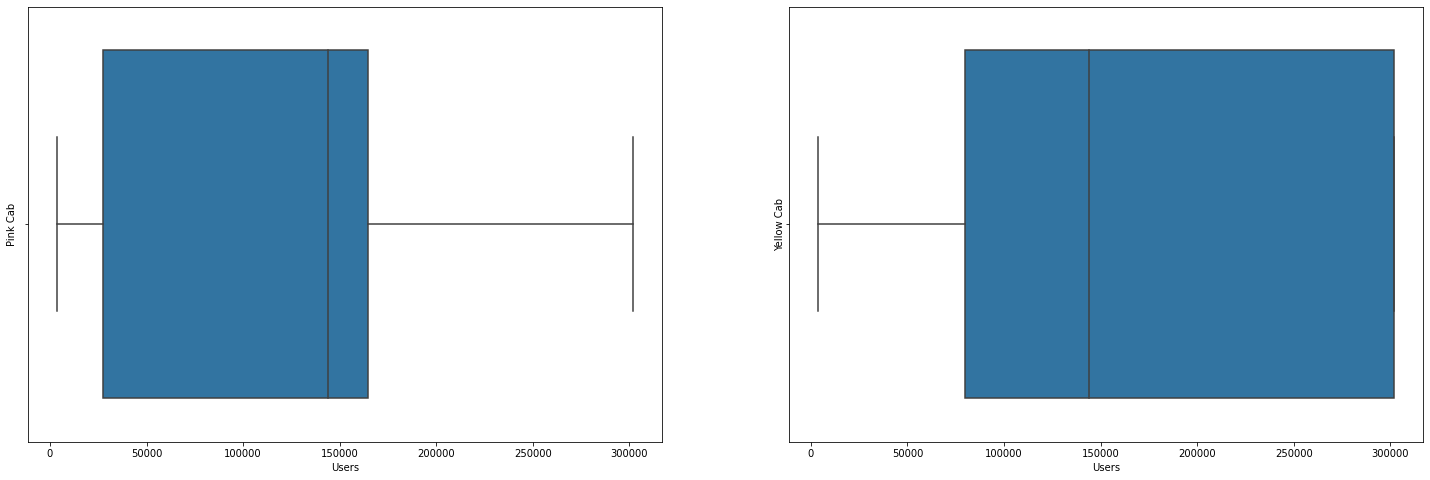

In [21]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
sns.boxplot(ax=axes[0], x='Users' ,    data=filtered_Pink_MasterData ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1], x='Users'   ,  data=filtered_Yellow_MasterData  ) .set_ylabel("Yellow Cab")

<AxesSubplot:>

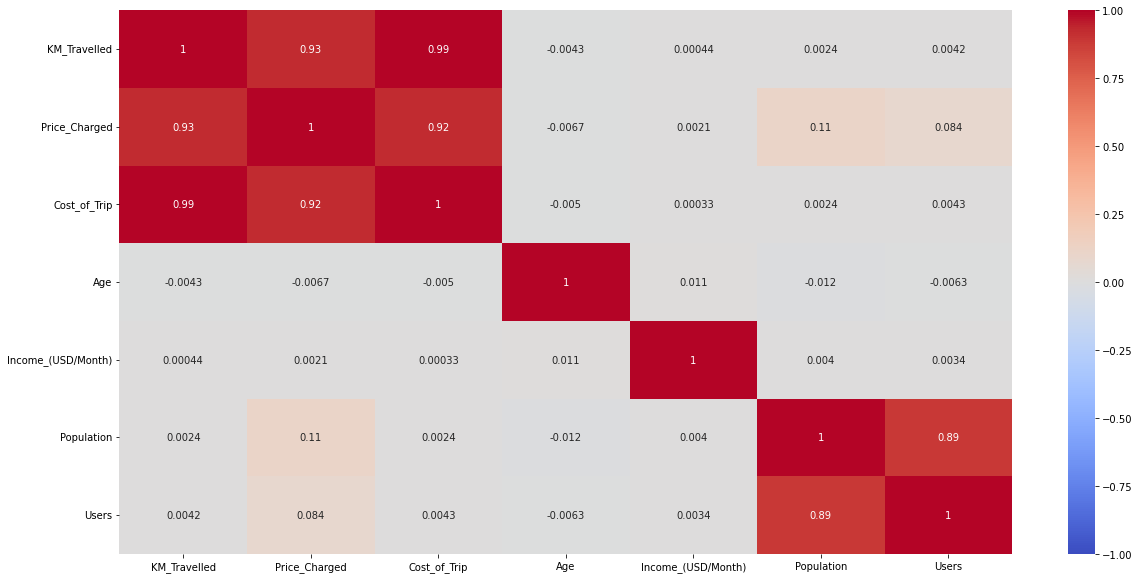

In [22]:
# Here visualized the correlation of MasterData features by heatmap for Pink Cab Firm.
Pink_Cab_Corr = filtered_Pink_MasterData.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Pink_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<AxesSubplot:>

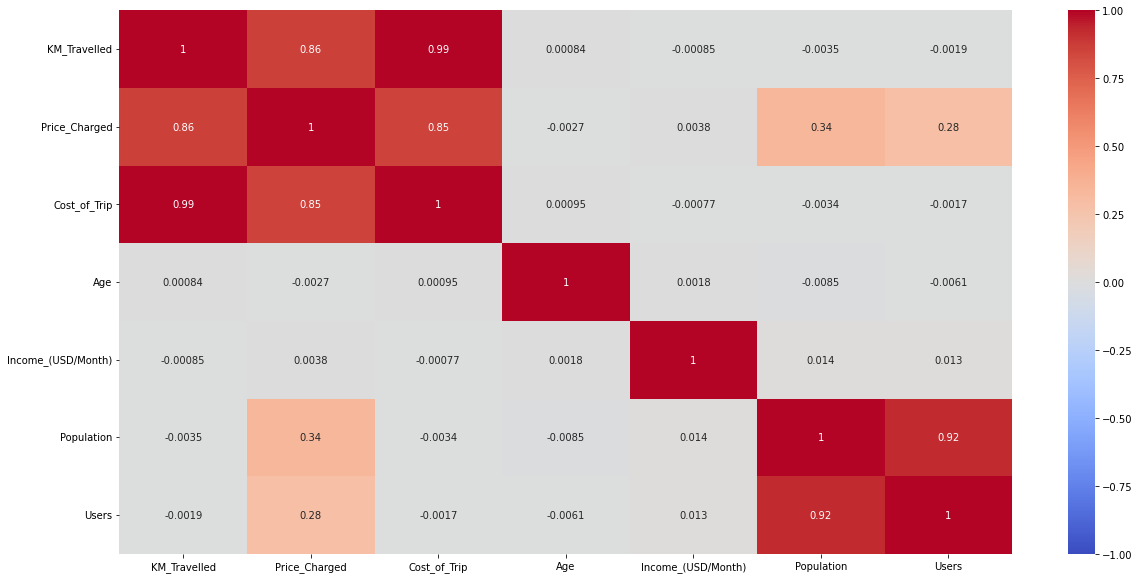

In [23]:
# Here visualized the correlation of MasterData features by heatmap for Pink Cab Firm.
Yellow_Cab_Corr = filtered_Yellow_MasterData.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Yellow_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

Text(0.5, 1.0, 'KM_Travelled  - Cost_of_Trip')

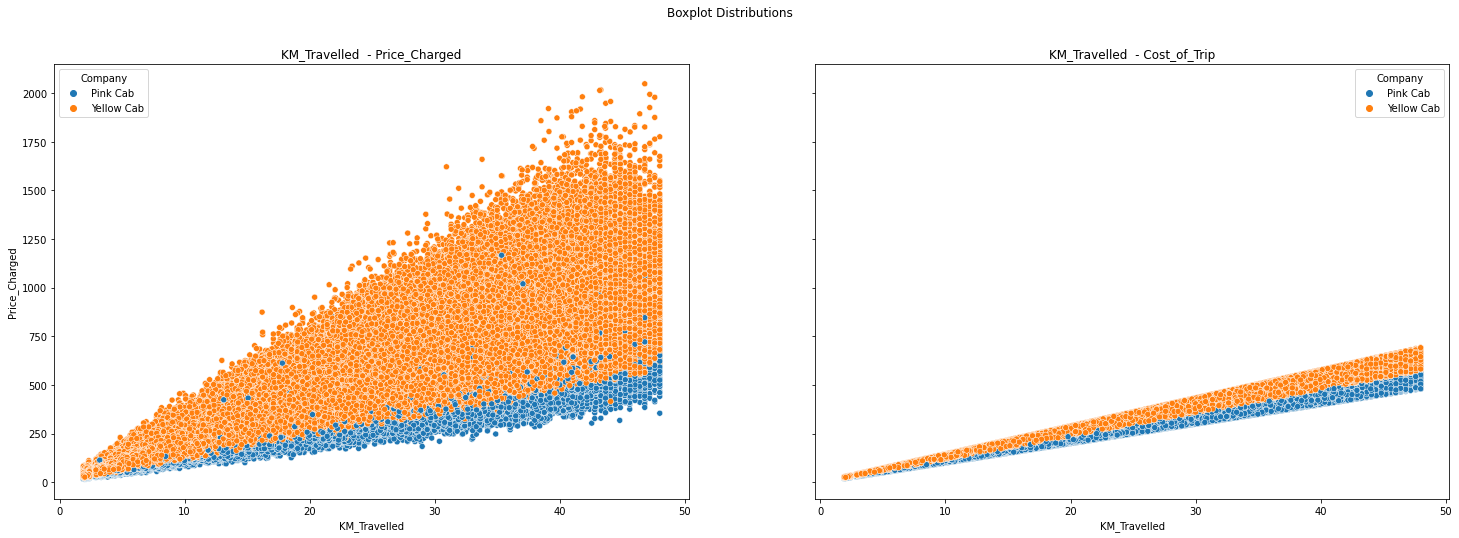

In [24]:
# Here visualized scatter plots of MasterData features to see correlations between them if exists
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(ax=axes[0],data=MasterData, x='KM_Travelled', y='Price_Charged' , hue="Company"  ).set_title("KM_Travelled  - Price_Charged")
sns.scatterplot(ax=axes[1],data=MasterData, x='KM_Travelled', y='Cost_of_Trip' , hue="Company").set_title("KM_Travelled  - Cost_of_Trip")

Text(0.5, 1.0, 'Price_Charged - Cost_of_Trip')

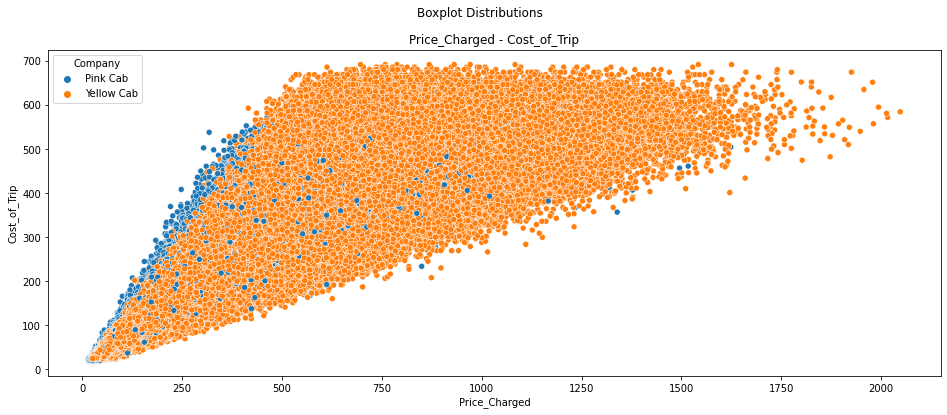

In [25]:
# Here visualized scatter plots of MasterData features to see correlations between them if exists
fig,axes = plt.subplots(figsize=(16, 6), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(data=MasterData, x='Price_Charged', y='Cost_of_Trip' , hue="Company").set_title("Price_Charged - Cost_of_Trip")

Text(0.5, 1.0, 'Population  - Users')

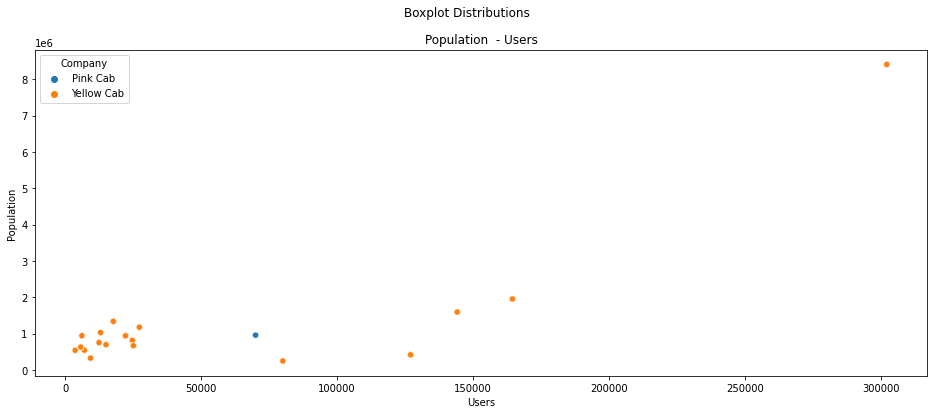

In [26]:
# Here visualized scatter plots of MasterData features to see correlations between them if exists
fig,axes = plt.subplots(figsize=(16, 6), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(data=MasterData, x='Users', y='Population' , hue="Company"  ).set_title("Population  - Users")

Text(0.5, 1.0, 'Users - Price_Charged')

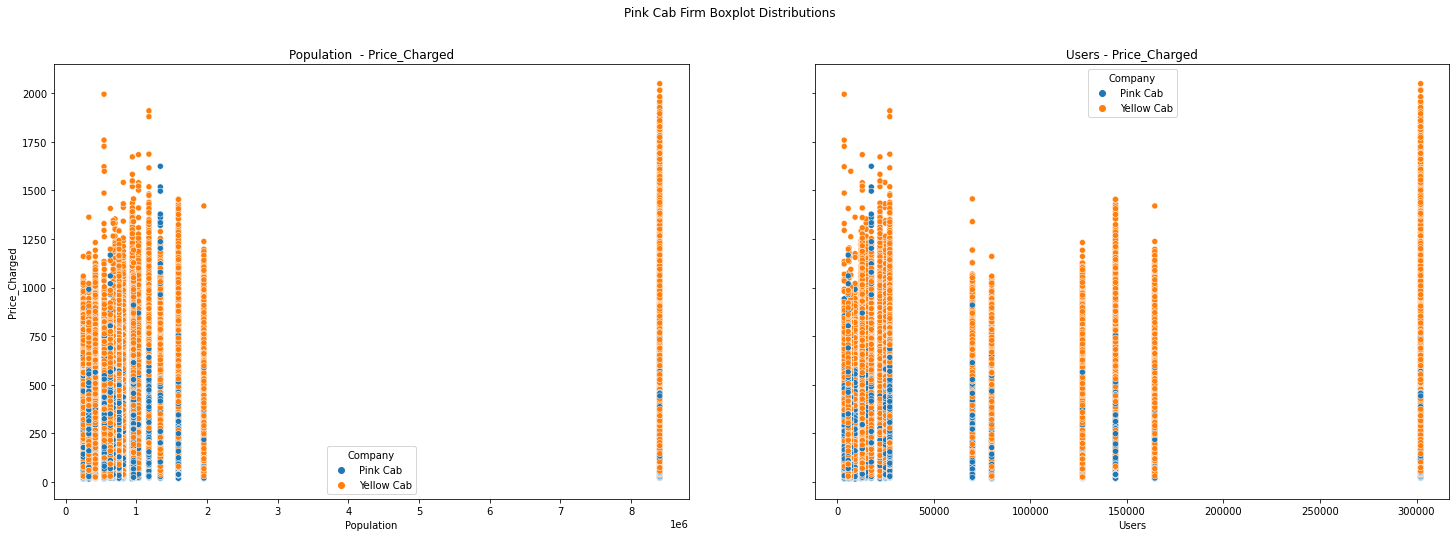

In [27]:
# Here visualized scatter plots of MasterData features to see correlations between them if exists
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Pink Cab Firm Boxplot Distributions')
sns.scatterplot(ax=axes[0],data=MasterData, x='Population', y='Price_Charged' , hue="Company").set_title("Population  - Price_Charged")
sns.scatterplot(ax=axes[1],data=MasterData, x='Users', y='Price_Charged' , hue="Company").set_title("Users - Price_Charged")

In [28]:
# Obtained covariance values for given features.

cov1  = np.cov(MasterData['KM_Travelled'],MasterData['Price_Charged'])[0][1]
cov2  = np.cov(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])[0][1]
cov3  = np.cov(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])[0][1]
cov4  = np.cov(MasterData['Users'],MasterData['Population'])[0][1]
cov5  = np.cov(MasterData['Population'],MasterData['Price_Charged'])[0][1]
cov6  = np.cov(MasterData['Users'],MasterData['Price_Charged'])[0][1]

print('Covariance for  KM_Travelled - Price_Charged : '+ str(cov1))
print('Covariance for  KM_Travelled - Cost_of_Trip : '+ str(cov2))
print('Covariance for  Price_Charged - Cost_of_Trip : '+ str(cov3))
print('Covariance for  Users - Population : '+ str(cov4))
print('Covariance for  Population - Price_Charged : '+ str(cov5))
print('Covariance for  Users - Price_Charged : '+ str(cov6))


Covariance for  KM_Travelled - Price_Charged : 2805.307041308072
Covariance for  KM_Travelled - Cost_of_Trip : 1897.7357483737026
Covariance for  Price_Charged - Cost_of_Trip : 37272.94904600311
Covariance for  Users - Population : 306082774585.4567
Covariance for  Population - Price_Charged : 297071855.0581955
Covariance for  Users - Price_Charged : 7777261.839139369


In [29]:
# Obtained pearson correlation coefficients for given features.

pcorr_coef1 , _ = stats.pearsonr(MasterData['KM_Travelled'],MasterData['Price_Charged'])
pcorr_coef2 , _ = stats.pearsonr(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])
pcorr_coef3 , _ = stats.pearsonr(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])
pcorr_coef4 , _ = stats.pearsonr(MasterData['Users'],MasterData['Population'])
pcorr_coef5 , _ = stats.pearsonr(MasterData['Population'],MasterData['Price_Charged'])
pcorr_coef6 , _ = stats.pearsonr(MasterData['Users'],MasterData['Price_Charged'])

print('pearson correlation coefficient for  KM_Travelled - Price_Charged : '+ str(pcorr_coef1))
print('pearson correlation coefficient for  KM_Travelled - Cost_of_Trip : '+ str(pcorr_coef2))
print('pearson correlation coefficient for  Price_Charged - Cost_of_Trip : '+ str(pcorr_coef3))
print('pearson correlation coefficient for  Users - Population : '+ str(pcorr_coef4))
print('pearson correlation coefficient for  Population - Price_Charged : '+ str(pcorr_coef5))
print('pearson correlation coefficient for  Users - Price_Charged : '+ str(pcorr_coef6))

pearson correlation coefficient for  KM_Travelled - Price_Charged : 0.8357531580209402
pearson correlation coefficient for  KM_Travelled - Cost_of_Trip : 0.9818483823189957
pearson correlation coefficient for  Price_Charged - Cost_of_Trip : 0.8598117262915663
pearson correlation coefficient for  Users - Population : 0.9154903444757323
pearson correlation coefficient for  Population - Price_Charged : 0.3265891710192653
pearson correlation coefficient for  Users - Price_Charged : 0.281060535691912


In [30]:
# Obtained spearman rank correlations and p - values for given features. 
spearman_rank_coeff1   = stats.spearmanr(MasterData['KM_Travelled'],MasterData['Price_Charged'])
spearman_rank_coeff2   = stats.spearmanr(MasterData['KM_Travelled'],MasterData['Cost_of_Trip'])
spearman_rank_coeff3   = stats.spearmanr(MasterData['Price_Charged'],MasterData['Cost_of_Trip'])
spearman_rank_coeff4   = stats.spearmanr(MasterData['Users'],MasterData['Population'])
spearman_rank_coeff5   = stats.spearmanr(MasterData['Population'],MasterData['Price_Charged'])
spearman_rank_coeff6   = stats.spearmanr(MasterData['Users'],MasterData['Price_Charged'])

print('spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : '+ str(spearman_rank_coeff1))
print('spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : '+ str(spearman_rank_coeff2))
print('spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : '+ str(spearman_rank_coeff3))
print('spearman rank coefficient coefficient for  Users - Population : '+ str(spearman_rank_coeff4))
print('spearman rank coefficient coefficient for  Population - Price_Charged : '+ str(spearman_rank_coeff5))
print('spearman rank coefficient coefficient for  Users - Price_Charged : '+ str(spearman_rank_coeff6))

spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : SpearmanrResult(correlation=0.8929579061229219, pvalue=0.0)
spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : SpearmanrResult(correlation=0.9845458363254245, pvalue=0.0)
spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : SpearmanrResult(correlation=0.9135811393768467, pvalue=0.0)
spearman rank coefficient coefficient for  Users - Population : SpearmanrResult(correlation=0.8742482215995742, pvalue=0.0)
spearman rank coefficient coefficient for  Population - Price_Charged : SpearmanrResult(correlation=0.20756103314228533, pvalue=0.0)
spearman rank coefficient coefficient for  Users - Price_Charged : SpearmanrResult(correlation=0.19826810856694127, pvalue=0.0)


#### ⚫ From the statistical data analysis ; We see that there is **strongly positive correlation** between **KM_Travelled - Price_Charged**  , **KM_Travelled - Cost_of_Trip** , **Price_Charged - Cost_of_Trip** , **Users - Population**  and also we prove that correlations by using spearman rank correlation , pearson correlation coefficient statistical tests and zero p-values which are lower than 0.05 value to satisfy the correlation values as statistically. 

### **Inferencial Data Analysis**

#### In this section ,  I analyzed MasterData and some meaningful pieces of MasterData which are extracted from it to make a sensable decision which Cab Firm is most valueble for investing in future times by taking insights and inferences from data analysis and visualizations with different aspects.

In [31]:
data0 = MasterData.groupby("Company").count()

fig1 = px.pie(data0,
                        values=data0.Users,
                        names=data0.index ,title="Pink & Yellow Cab Firm Total Users Overview"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; The total number of users of **Yellow Cab** is **approximately 3 times that of Pink Cab**.

In [32]:
data1_0 = MasterData[MasterData["Company"] == "Pink Cab"].groupby("City").count()
data1_1 = MasterData[MasterData["Company"] == "Yellow Cab"].groupby("City").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Users'],
                    name='Pink Cab',
                    marker_color='indianred' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Users'],
                    name='Yellow Cab',
                    marker_color='blue'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over City" )

#### ⚫ As seen from this Bar Chart; For the **Yellow Cab** Company, the highest number of users on a city basis are in **New York, Washington and Chicago**, while for the **Pink Cab** Company, the most are in **Los Angeles, New York and San Diego**.

In [33]:
data2_0 = MasterData.groupby("City").count()
fig1 = px.pie(data2_0,
                        values=data2_0.Users,
                        names=data2_0.index ,title="Total Users Overview by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; On the basis of **cities**, the **highest number of total users**  are in **New York, Chicago, Los Angeles, Washington and Boston**.

In [34]:
MasterData["User_Pop_Ratio"] = MasterData["Users"] / MasterData["Population"]
MasterData["Profit_of_Trip"] = MasterData["Price_Charged"] - MasterData["Cost_of_Trip"]
data2_1 = MasterData.groupby("City").sum()
fig1 = px.pie(data2_1,
                        values=data2_1.Profit_of_Trip,
                        names=data2_1.index ,title="Total Market Profit Share by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; **More than half of the total market profit share** on the basis of cities belongs to **New York**.

In [35]:
pinkData = MasterData[MasterData['Company'] == 'Pink Cab']
yellowData = MasterData[MasterData['Company'] == 'Yellow Cab']

dict1 = {"Pink Cab" : [pinkData["Profit_of_Trip"].sum()] ,"Yellow Cab" : [yellowData["Profit_of_Trip"].sum()] }

data2_2 = pd.DataFrame(dict1).T

fig1 = px.pie(data2_2,
                        values=data2_2[0],
                        names=data2_2.index ,title="Total Market Profit Share by Cab Firms"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; The **total market profit share** of **Yellow Cab** is **approximately 9 times that of Pink Cab**.

In [36]:
data3_0 = MasterData.groupby("Gender").count()
fig1 = px.pie(data3_0,
                        values=data3_0.Users,
                        names=data3_0.index ,title="Total Users Overview by Gender"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; In the **distribution of users by gender**, there is an approximate **3 to 2 ratio for men and women**.

In [37]:
data3_1 = MasterData[MasterData["Company"] == "Pink Cab"].groupby("Gender").count()
data3_2 = MasterData[MasterData["Company"] == "Yellow Cab"].groupby("Gender").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data3_1.index,
                    y=data3_1['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data3_2.index,
                    y=data3_2['Users'],
                    name='Yellow Cab',
                    marker_color='orange'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over Gender" )

#### ⚫ As seen from this Bar Chart; When the distribution of users by gender is analyzed on a company basis, while the **male-female ratio is 57.6% - 42.4% in Yellow Cab** Company, the **male-female ratio is 55.9% - 44.1% in Pink Cab** Company.

In [38]:
data3_3 = MasterData.groupby("Payment_Mode").count()
fig1 = px.pie(data3_3,
                        values=data3_3.Users,
                        names=data3_3.index ,title="Total Users Overview by Payment Method"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; Considering the payment preferences of all users, the **credit card- cash payment ratio is 3 to 2**.

In [39]:
ageGroup_Young  = MasterData[(MasterData ["Age"] >= 18) & (MasterData ["Age"] < 25)].count()
ageGroup_Middle = MasterData[(MasterData ["Age"] >= 25) & (MasterData ["Age"] < 40)].count()
ageGroup_Old    = MasterData[(MasterData ["Age"] >= 40) & (MasterData ["Age"] <= 65)].count()

dict = {"25 > Age >= 18 (YOUNG)" : ageGroup_Young ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle , "65 >= Age >= 40 (OLD)" : ageGroup_Old }
data4_0 = pd.DataFrame(dict).T

fig1 = px.pie(data4_0 ,
                        values=data4_0.Users,
                        names=data4_0.index ,title="Total Users Overview by Age Groups"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 ) 

 

#### ⚫ As seen from this Pie Chart; Looking at the **age distribution of all users**, it is seen that **approximately half of them** are between the ages of **18-25**.

In [40]:
ageGroup_Young_Pink    = MasterData[(MasterData ["Age"] >= 18) & (MasterData ["Age"] < 25) & (MasterData["Company"] == "Pink Cab")] .count()
ageGroup_Middle_Pink   = MasterData[(MasterData ["Age"] >= 25) & (MasterData ["Age"] < 40) & (MasterData["Company"] == "Pink Cab")].count()
ageGroup_Old_Pink      = MasterData[(MasterData ["Age"] >= 40) & (MasterData ["Age"] <= 65) & (MasterData["Company"] == "Pink Cab")].count()

ageGroup_Young_Yellow  = MasterData[(MasterData ["Age"] >= 18) & (MasterData ["Age"] < 25) & (MasterData["Company"] == "Yellow Cab")] .count()
ageGroup_Middle_Yellow = MasterData[(MasterData ["Age"] >= 25) & (MasterData ["Age"] < 40) & (MasterData["Company"] == "Yellow Cab")].count()
ageGroup_Old_Yellow    = MasterData[(MasterData ["Age"] >= 40) & (MasterData ["Age"] <= 65) & (MasterData["Company"] == "Yellow Cab")].count()

dict0 = { "25 > Age >= 18 (YOUNG)" : ageGroup_Young_Pink ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle_Pink , "65 >= Age >= 40 (OLD)" : ageGroup_Old_Pink }

dict1 = { "25 > Age >= 18 (YOUNG)" : ageGroup_Young_Yellow ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle_Yellow , "65 >= Age >= 40 (OLD)" : ageGroup_Old_Yellow }

data4_1 = pd.DataFrame(dict0).T
data4_2 = pd.DataFrame(dict1).T

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data4_1.index,
                    y=data4_1['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data4_2.index,
                    y=data4_2['Users'],
                    name='Yellow Cab',
                    marker_color='orange'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distributions by Age Groups" )

#### ⚫ As seen from this Bar Chart; Looking at the **age distribution of all users in the basis of companies**, it is seen that both have the **same percentage distribution for every age group** .

In [41]:
data5_0 = MasterData.groupby("City")["Income_(USD/Month)"].mean()
data5_0 = pd.DataFrame(data5_0)
fig1 = px.pie(data5_0,
                        values=data5_0["Income_(USD/Month)"],
                        names=data5_0.index ,title="Average Income by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )


#### ⚫ As seen from this Pie Chart; The **average income of all users by city** is approximately **equal**.

In [42]:
data5_1 = MasterData.groupby("Company")["Income_(USD/Month)"].mean()
data5_1 = pd.DataFrame(data5_1)
fig1 = px.pie(data5_1,
                        values=data5_1["Income_(USD/Month)"],
                        names=data5_1.index ,title="Average Income by Cab Firm"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; The **average income of all users by companies** is approximately **equal**.

In [43]:
data5_2 = MasterData.groupby("City")["KM_Travelled"].sum()
data5_2 = pd.DataFrame(data5_2)
fig1 = px.pie(data5_2,
                        values=data5_2["KM_Travelled"],
                        names=data5_2.index ,title="Total KM Travelled by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; On the basis of **cities**, the **most travelled in KM**  are **New York, Chicago, Los Angeles, Washington and Boston**.

In [44]:
data5_3 = MasterData.groupby("Company")["KM_Travelled"].sum()
data5_3 = pd.DataFrame(data5_3)
fig1 = px.pie(data5_3,
                        values=data5_3["KM_Travelled"],
                        names=data5_3.index ,title="Total KM Travelled by Cab Firm"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; The **total travelled in KM** for **Yellow Cab** is **approximately 3 times that of Pink Cab**.

In [45]:
MasterData["Profit_per_KM"] = MasterData["Profit_of_Trip"].sum() / MasterData["KM_Travelled"].sum()
data5_4 = MasterData.groupby("City")["Profit_per_KM"].mean()
data5_4 = pd.DataFrame(data5_4)

fig1 = px.pie(data5_4,
                        values=data5_4["Profit_per_KM"],
                        names=data5_4.index ,title="Average Profit per KM Travelled by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; The **average profit per travelled in KM by cities** is approximately **equal**.

In [46]:
data5_5 = MasterData.groupby("Company")["Profit_per_KM"].mean()
data5_5 = pd.DataFrame(data5_5)

fig1 = px.pie(data5_5,
                        values=data5_5["Profit_per_KM"],
                        names=data5_5.index ,title="Average Profit per KM Travelled by Cab Firm"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

#### ⚫ As seen from this Pie Chart; The **average profit per travelled in KM by companies** is approximately **equal**.

#### **Time Series Analysis**

In [47]:
MasterData['Year_of_Travel'] = MasterData['Date_of_Travel'].dt.year
MasterData['Month_of_Travel'] = MasterData['Date_of_Travel'].dt.month
MasterData['Day_of_Travel'] = MasterData['Date_of_Travel'].dt.day

MasterData_TimeSeries=MasterData.set_index('Date_of_Travel')
MasterData_TimeSeries.head(10)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,User_Pop_Ratio,Profit_of_Trip,Profit_per_KM,Year_of_Travel,Month_of_Travel,Day_of_Travel
Date_of_Travel,,,,,,,,,,,,,,,,,,,
2016-08-01,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,0.030312,57.3150,6.081963,2016,8,1
2018-07-21,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,0.030312,281.2772,6.081963,2018,7,21
2018-11-23,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,0.030312,194.6480,6.081963,2018,11,23
2016-06-01,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,0.030312,23.6660,6.081963,2016,6,1
2018-04-21,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,0.030312,253.9808,6.081963,2018,4,21
2018-04-05,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701,0.030312,50.8912,6.081963,2018,4,5
2018-10-27,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701,0.030312,25.0960,6.081963,2018,10,27
2016-02-01,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,0.030312,27.5680,6.081963,2016,2,1
2016-09-21,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701,0.030312,210.0920,6.081963,2016,9,21


In [48]:
years_list = ["2016","2017","2018"]

def year_pink():
    
    
    
    profit_2016 = round ( MasterData[(MasterData['Year_of_Travel'] == 2016) & (MasterData.Company == "Pink Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2017 = round ( MasterData[(MasterData['Year_of_Travel'] == 2017) & (MasterData.Company == "Pink Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2018 = round ( MasterData[(MasterData['Year_of_Travel'] == 2018) & (MasterData.Company == "Pink Cab")]["Profit_of_Trip"].sum() ,2)
    
    profits = [profit_2016, profit_2017, profit_2018]
    
    return profits

   

def year_yellow():
    
    
    profit_2016 = round ( MasterData[(MasterData['Year_of_Travel'] == 2016) & (MasterData.Company == "Yellow Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2017 = round ( MasterData[(MasterData['Year_of_Travel'] == 2017) & (MasterData.Company == "Yellow Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2018 = round ( MasterData[(MasterData['Year_of_Travel'] == 2018) & (MasterData.Company == "Yellow Cab")]["Profit_of_Trip"].sum() ,2)
    
    profits = [profit_2016, profit_2017, profit_2018]
    
    return profits
   

yellow = year_yellow()
pink = year_pink()
zippedy = zip(yellow,years_list)
zippedp = zip(pink,years_list)

datap = pd.DataFrame(zippedp,columns=["Profit","Year"])
datay = pd.DataFrame(zippedy,columns=["Profit","Year"])

fig = go.Figure()
fig.add_trace(go.Scatter(x=datay.Year, y=datay.Profit,
                    mode='lines+markers',
                    name='Yellow Cab'
                    ))
fig.add_trace(go.Scatter(x=datap.Year, y=datap.Profit,
                    mode='lines+markers',
                    name='Pink Cab'
                     ))
fig.update_layout(
    title="Total Profit per year by Cab Firm",
    xaxis_title="Years",
    yaxis_title="Profits",
    legend_title="Cab Companies",
)

fig.show()


#### ⚫ As seen from this Pie Chart; 
In 2016 , The **total market profit share** of **Yellow Cab** is **approximately 8.15 times that of Pink Cab**.
In 2017 , The **total market profit share** of **Yellow Cab** is **approximately 8.16 times that of Pink Cab**.
In 2018 , The **total market profit share** of **Yellow Cab** is **approximately 8.66 times that of Pink Cab**

### ⚫ **Overall Conclusion**

When we consider for both Cab Firms in terms of **total market profit share** , **total user share**  , **yearly market profit share** , **total travelled in KM by Users**  ;  we will recommend **Yellow Cab Firm** for investment. 


In [49]:
MasterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Date_of_Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM_Travelled        359392 non-null  float64       
 5   Price_Charged       359392 non-null  float64       
 6   Cost_of_Trip        359392 non-null  float64       
 7   Customer_ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  category      
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income_(USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no